In [1]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/ec2-user/anaconda3/envs/theano_p36/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7301 on context None
Mapped name None to device cuda: Tesla K80 (0000:00:1E.0)


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (5, 5), input_shape = (200, 200, 3), activation = 'relu'))

In [4]:
classifier.add(Conv2D(32, (5, 5)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

# TODO: change sigmoid to softmax and increase the number of classes that the Dense layer has (25)

# initiate RMSprop optimizer
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('train',
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test',
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary')

Found 2549 images belonging to 2 classes.
Found 972 images belonging to 2 classes.


In [6]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
classifier.fit_generator(training_set,
epochs = 5,
validation_data = test_set)

Epoch 1/5
80/80 [==============================] - 81s 1s/step - loss: 0.6663 - acc: 0.5906 - val_loss: 0.6751 - val_acc: 0.5123
Epoch 2/5
80/80 [==============================] - 94s 1s/step - loss: 0.4923 - acc: 0.7554 - val_loss: 0.5467 - val_acc: 0.6811
Epoch 3/5
80/80 [==============================] - 103s 1s/step - loss: 0.3189 - acc: 0.8619 - val_loss: 0.4425 - val_acc: 0.7510
Epoch 4/5
80/80 [==============================] - 97s 1s/step - loss: 0.2175 - acc: 0.9119 - val_loss: 0.3586 - val_acc: 0.8261
Epoch 5/5
80/80 [==============================] - 81s 1s/step - loss: 0.1477 - acc: 0.9447 - val_loss: 0.2878 - val_acc: 0.8714


In [10]:
classifier.evaluate_generator(test_set)

[0.2878283513671577, 0.8713991767094459]

In [65]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test/B/B1071_train.jpg', target_size = (200, 200))
test_image = (image.img_to_array(test_image)) / 255.
print(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
print(result)
# TODO: doing argmax on the result to find which letter it corresponds to
print(result[0][0])
if result[0][0] == 0.5:
    prediction = 'A'
else:
    prediction = 'B'
    
print(prediction)


[[[0.         0.01960784 0.9843137 ]
  [0.00392157 0.01568628 1.        ]
  [0.         0.         0.9843137 ]
  ...
  [0.01568628 0.         0.99607843]
  [0.         0.         0.9882353 ]
  [0.         0.01176471 1.        ]]

 [[0.00392157 0.00392157 1.        ]
  [0.01176471 0.         0.9019608 ]
  [0.07058824 0.02352941 0.78431374]
  ...
  [0.04705882 0.01568628 0.69411767]
  [0.06666667 0.03921569 0.83137256]
  [0.         0.         0.9411765 ]]

 [[0.01568628 0.         0.99607843]
  [0.07058824 0.01568628 0.79607844]
  [0.49411765 0.43529412 0.7607843 ]
  ...
  [0.43137255 0.41568628 0.52156866]
  [0.3764706  0.34901962 0.7529412 ]
  [0.05098039 0.02352941 0.80784315]]

 ...

 [[0.02352941 0.         1.        ]
  [0.03529412 0.03137255 0.73333335]
  [0.80784315 0.85490197 1.        ]
  ...
  [0.7019608  0.6745098  0.6117647 ]
  [0.67058825 0.6627451  0.92156863]
  [0.03529412 0.03137255 0.74509805]]

 [[0.00392157 0.         0.99215686]
  [0.02745098 0.03137255 0.8235294 ]


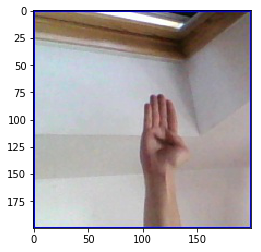

In [63]:
im = test_image
import matplotlib.pyplot as plt
plt.imshow(im[0])

In [48]:
plt.show()